### สำหรับคนที่เก็บและวิเคราะห์ข้อมูลจริง กับแนวความคิดเรื่องการจำลองสถานการณ์ด้วย Monte Carlo อาจจะเป็นเรื่องแปลกสำหรับเขาเหล่านั้น 

# 1. Start with C : Percent to Plan
##### - **Use ***Normal distribution*** : แต่ละคนขายเก่งไม่เท่ากัน**
- mean = 1 (100 %)
- sd = 0.1 (10 %) ==> -90 % -> 110 %
- Mean & SD get from past data 5 or 10 years before

# 2. Random A : Sales Target of each saleman
- **Use weighted ***unifrom*** distribution**

# 3. Calculate B : Actual Sales : A * C
 - **Not directly random this attribute**
 
# 4. D : See Commision Rate 
- firm design this information

# 5. What we want E : (B * D) / 100

In [1]:
### FLOW CHART


# N : number of trials 0 -> N
# m : number of salemans 500 people ?

# random sales target = m amount

# calculate Actual sales & commission rate

# calculate commission amount

# calculate total commission amout [i] from m salespeople

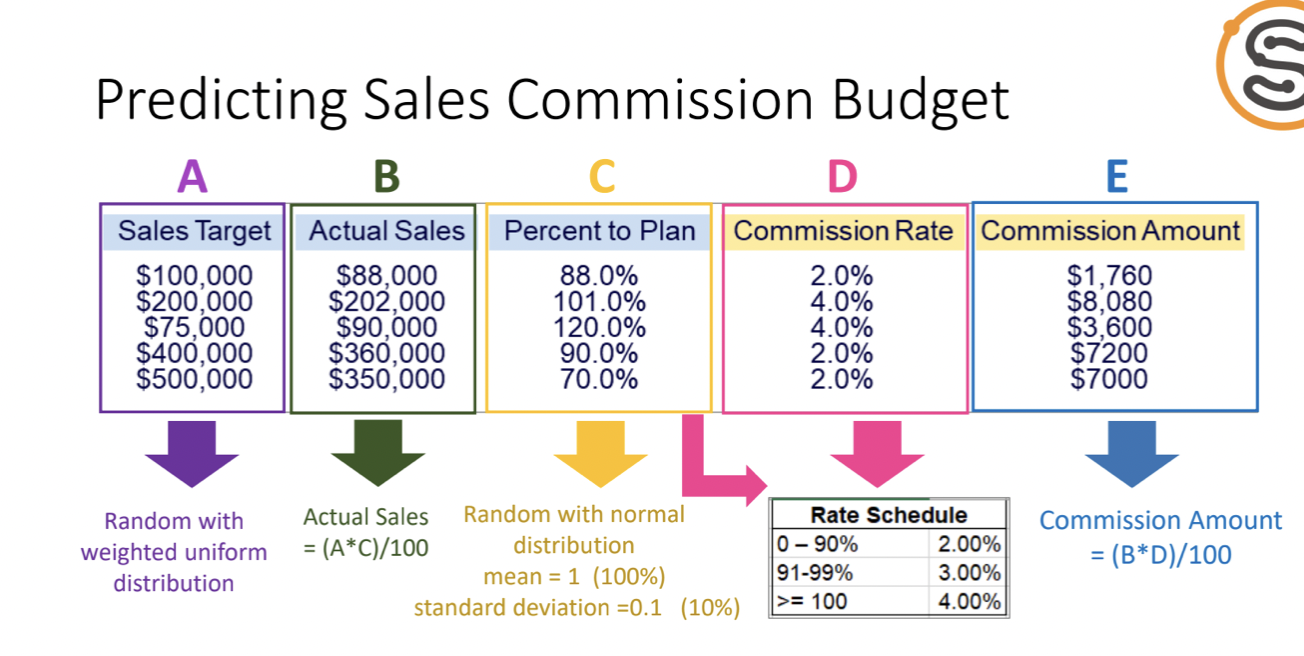

# 1. C : Percent to Plan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [3]:
avg = 1
std_dev = .1
num_reps = 500
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
pct_to_target[:20]

array([0.88, 0.96, 0.85, 0.97, 1.11, 1.03, 0.95, 0.96, 0.91, 1.01, 1.04,
       1.03, 1.1 , 0.99, 1.01, 0.88, 1.06, 1.11, 0.97, 0.97])

# 2. A : Sales Target

In [4]:
np.random.choice(["A", "B", "C"], 10)

array(['A', 'A', 'C', 'C', 'A', 'C', 'A', 'C', 'A', 'B'], dtype='<U1')

In [5]:
# how many choices -> you must create choices
np.random.choice(["A", "B", "C"], 10,
            p =  [.5 ,  .4,  .1])
            # p =  [9, 9, 9])

array(['A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'C'], dtype='<U1')

In [6]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, 
                               num_reps,
                               p = sales_target_prob)
sales_target[:10]

array([ 75000, 400000,  75000, 200000,  75000, 300000, 100000, 200000,
       300000,  75000])

In [7]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
'Sales_Target': sales_target})

In [8]:
df = pd.DataFrame(
    # index=range(num_reps),
    data={"Pct_To_Target" : pct_to_target,
      "Sales_Target" : sales_target})
df

,Pct_To_Target,Sales_Target
0,0.88,75000
1,0.96,400000
2,0.85,75000
3,0.97,200000
4,1.11,75000
...,...,...
495,1.06,300000
496,0.78,75000
497,1.05,300000
498,0.92,75000


# 3. B : Actual Sales

In [9]:
df["Sales"] = df.Pct_To_Target * df.Sales_Target
df

,Pct_To_Target,Sales_Target,Sales
0,0.88,75000,66000.0
1,0.96,400000,384000.0
2,0.85,75000,63750.0
3,0.97,200000,194000.0
4,1.11,75000,83250.0
...,...,...,...
495,1.06,300000,318000.0
496,0.78,75000,58500.0
497,1.05,300000,315000.0
498,0.92,75000,69000.0


In [10]:
df.Sales.mean()

173221.0

In [11]:
df.Sales.describe()

count       500.00000
mean     173221.00000
std      125871.07079
min       56250.00000
25%       81000.00000
50%      108500.00000
75%      218000.00000
max      585000.00000
Name: Sales, dtype: float64

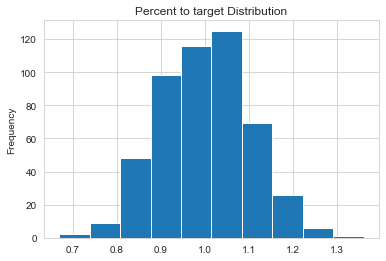

In [12]:
df.Pct_To_Target.plot(kind="hist", title="Percent to target Distribution")
plt.show()

<AxesSubplot:title={'center':'Percent to target Distribution'}, ylabel='Frequency'>

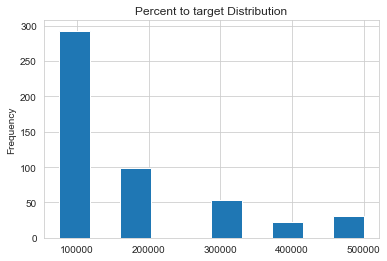

In [13]:
df.Sales_Target.plot(kind="hist", title="Percent to target Distribution")

<AxesSubplot:xlabel='Sales_Target', ylabel='count'>

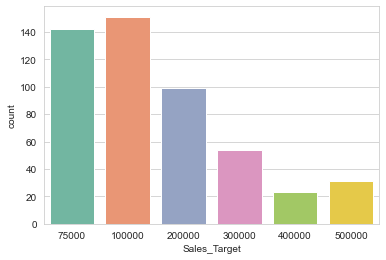

In [14]:
sns.countplot(data=df, x="Sales_Target", palette='Set2')

# 4. D : Commission Rate

In [15]:
def calc_commission_rate(x):
    if x <= .9:
        return .02
    if x <= .99:
        return .03
    else:
        return 0.04

In [16]:
df["Commission_Rate"] = df.Pct_To_Target.apply(calc_commission_rate)
df

,Pct_To_Target,Sales_Target,Sales,Commission_Rate
0,0.88,75000,66000.0,0.02
1,0.96,400000,384000.0,0.03
2,0.85,75000,63750.0,0.02
3,0.97,200000,194000.0,0.03
4,1.11,75000,83250.0,0.04
...,...,...,...,...
495,1.06,300000,318000.0,0.04
496,0.78,75000,58500.0,0.02
497,1.05,300000,315000.0,0.04
498,0.92,75000,69000.0,0.03


In [17]:
df.Commission_Rate.count()

500

In [18]:
df.Commission_Rate.describe()

count    500.000000
mean       0.033420
std        0.007656
min        0.020000
25%        0.030000
50%        0.040000
75%        0.040000
max        0.040000
Name: Commission_Rate, dtype: float64

# 5. D : ***Commission Amount***

In [19]:
nums_simulation = 1000
all_stats = []

for trial in range(nums_simulation):
    
    sales_target = np.random.choice(sales_target_values,
                                   num_reps,
                                   p = sales_target_prob)
    pct_to_target = np.random.normal(avg,
                                    std_dev,
                                    num_reps).round(2)
    df = pd.DataFrame(data={
        "Pct_To_Target" : pct_to_target,
        "Sales_Target": sales_target
    })
    
    df["Sales"] = df["Pct_To_Target"] * df["Sales_Target"]
    
    df["Commission_Rate"] = df["Pct_To_Target"].apply(calc_commission_rate)
    df["Commission_Amount"] = df["Pct_To_Target"] * df["Sales"]
    
    all_stats.append([
        df["Sales"].sum().round(0),
        df["Commission_Amount"].sum().round(0),
        df["Sales_Target"].sum().round(0)
    ])

In [20]:
all_stats[:5]

[[81706500.0, 82687585.0, 81575000],
 [80470500.0, 81317325.0, 80500000],
 [88397250.0, 89517762.0, 88225000],
 [79114250.0, 79551702.0, 79525000],
 [80788750.0, 81332342.0, 81025000]]

In [21]:
all_stats[-5:]

[[81820000.0, 83227610.0, 81275000],
 [80691750.0, 80424618.0, 81750000],
 [83193250.0, 83578818.0, 83625000],
 [83809750.0, 85155962.0, 83275000],
 [80429750.0, 81005388.0, 80625000]]

In [22]:
cols = ["Sales", "Commission_Amount", "Sales_Target"]
# results_df = pd.DataFrame(
# Same as Above
results_df = pd.DataFrame.from_records(
    all_stats, columns=cols
)
results_df

,Sales,Commission_Amount,Sales_Target
0,81706500.0,82687585.0,81575000
1,80470500.0,81317325.0,80500000
2,88397250.0,89517762.0,88225000
3,79114250.0,79551702.0,79525000
4,80788750.0,81332342.0,81025000
...,...,...,...
995,81820000.0,83227610.0,81275000
996,80691750.0,80424618.0,81750000
997,83193250.0,83578818.0,83625000
998,83809750.0,85155962.0,83275000


In [23]:
# results_df.describe().style.format("{:,.2f}")
results_df.describe().style.format("{:,.2f}")
results_df.describe().style.format("{:,.0f}")

,Sales,Commission_Amount,Sales_Target
count,"1,000","1,000","1,000"
mean,"83,664,286","84,485,709","83,680,475"
std,"2,712,327","2,875,977","2,652,386"
min,"76,340,250","75,788,248","76,675,000"
25%,"81,763,062","82,379,412","81,825,000"
50%,"83,705,625","84,513,574","83,737,500"
75%,"85,515,000","86,419,566","85,425,000"
max,"91,137,750","92,412,608","91,300,000"


In [24]:
from tabulate import tabulate

In [25]:
print((tabulate
       (
        results_df.describe()
        , headers='keys'
        , floatfmt=",.2f"
        , tablefmt='psql'
        )
  )
)

+-------+---------------+---------------------+----------------+
|       |         Sales |   Commission_Amount |   Sales_Target |
|-------+---------------+---------------------+----------------|
| count |      1,000.00 |            1,000.00 |       1,000.00 |
| mean  | 83,664,286.25 |       84,485,708.86 |  83,680,475.00 |
| std   |  2,712,327.00 |        2,875,977.35 |   2,652,385.87 |
| min   | 76,340,250.00 |       75,788,248.00 |  76,675,000.00 |
| 25%   | 81,763,062.50 |       82,379,412.50 |  81,825,000.00 |
| 50%   | 83,705,625.00 |       84,513,573.50 |  83,737,500.00 |
| 75%   | 85,515,000.00 |       86,419,565.50 |  85,425,000.00 |
| max   | 91,137,750.00 |       92,412,608.00 |  91,300,000.00 |
+-------+---------------+---------------------+----------------+


In [26]:
print((tabulate
       (
        results_df.describe()
        , headers='keys'
        , floatfmt=",.2f"
        , tablefmt='grid'
        )
  )
)

+-------+---------------+---------------------+----------------+
|       |         Sales |   Commission_Amount |   Sales_Target |
+=======+===============+=====================+================+
| count |      1,000.00 |            1,000.00 |       1,000.00 |
+-------+---------------+---------------------+----------------+
| mean  | 83,664,286.25 |       84,485,708.86 |  83,680,475.00 |
+-------+---------------+---------------------+----------------+
| std   |  2,712,327.00 |        2,875,977.35 |   2,652,385.87 |
+-------+---------------+---------------------+----------------+
| min   | 76,340,250.00 |       75,788,248.00 |  76,675,000.00 |
+-------+---------------+---------------------+----------------+
| 25%   | 81,763,062.50 |       82,379,412.50 |  81,825,000.00 |
+-------+---------------+---------------------+----------------+
| 50%   | 83,705,625.00 |       84,513,573.50 |  83,737,500.00 |
+-------+---------------+---------------------+----------------+
| 75%   | 85,515,000.00 |

In [27]:
print((tabulate
       (
        results_df.describe()
        , headers='keys'
        , floatfmt=",.2f"
        , tablefmt='fancy_grid'
        )
  )
)

╒═══════╤═══════════════╤═════════════════════╤════════════════╕
│       │         Sales │   Commission_Amount │   Sales_Target │
╞═══════╪═══════════════╪═════════════════════╪════════════════╡
│ count │      1,000.00 │            1,000.00 │       1,000.00 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ mean  │ 83,664,286.25 │       84,485,708.86 │  83,680,475.00 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ std   │  2,712,327.00 │        2,875,977.35 │   2,652,385.87 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ min   │ 76,340,250.00 │       75,788,248.00 │  76,675,000.00 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ 25%   │ 81,763,062.50 │       82,379,412.50 │  81,825,000.00 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ 50%   │ 83,705,625.00 │       84,513,573.50 │  83,737,500.00 │
├───────┼───────────────┼─────────────────────┼────────────────┤
│ 75%   │ 85,515,000.00 │

In [28]:
tabulate(
    results_df.describe(),
    headers='keys',
    floatfmt=",.2f",
    tablefmt='psql')



'+-------+---------------+---------------------+----------------+\n|       |         Sales |   Commission_Amount |   Sales_Target |\n|-------+---------------+---------------------+----------------|\n| count |      1,000.00 |            1,000.00 |       1,000.00 |\n| mean  | 83,664,286.25 |       84,485,708.86 |  83,680,475.00 |\n| std   |  2,712,327.00 |        2,875,977.35 |   2,652,385.87 |\n| min   | 76,340,250.00 |       75,788,248.00 |  76,675,000.00 |\n| 25%   | 81,763,062.50 |       82,379,412.50 |  81,825,000.00 |\n| 50%   | 83,705,625.00 |       84,513,573.50 |  83,737,500.00 |\n| 75%   | 85,515,000.00 |       86,419,565.50 |  85,425,000.00 |\n| max   | 91,137,750.00 |       92,412,608.00 |  91,300,000.00 |\n+-------+---------------+---------------------+----------------+'

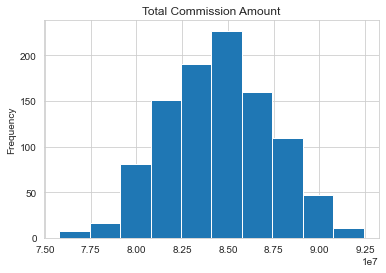

In [29]:
results_df['Commission_Amount'] \
    .plot(kind='hist', title="Total Commission Amount")

plt.show()

In [30]:
results_df

,Sales,Commission_Amount,Sales_Target
0,81706500.0,82687585.0,81575000
1,80470500.0,81317325.0,80500000
2,88397250.0,89517762.0,88225000
3,79114250.0,79551702.0,79525000
4,80788750.0,81332342.0,81025000
...,...,...,...
995,81820000.0,83227610.0,81275000
996,80691750.0,80424618.0,81750000
997,83193250.0,83578818.0,83625000
998,83809750.0,85155962.0,83275000


# Anim

In [31]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

0.0
0.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0


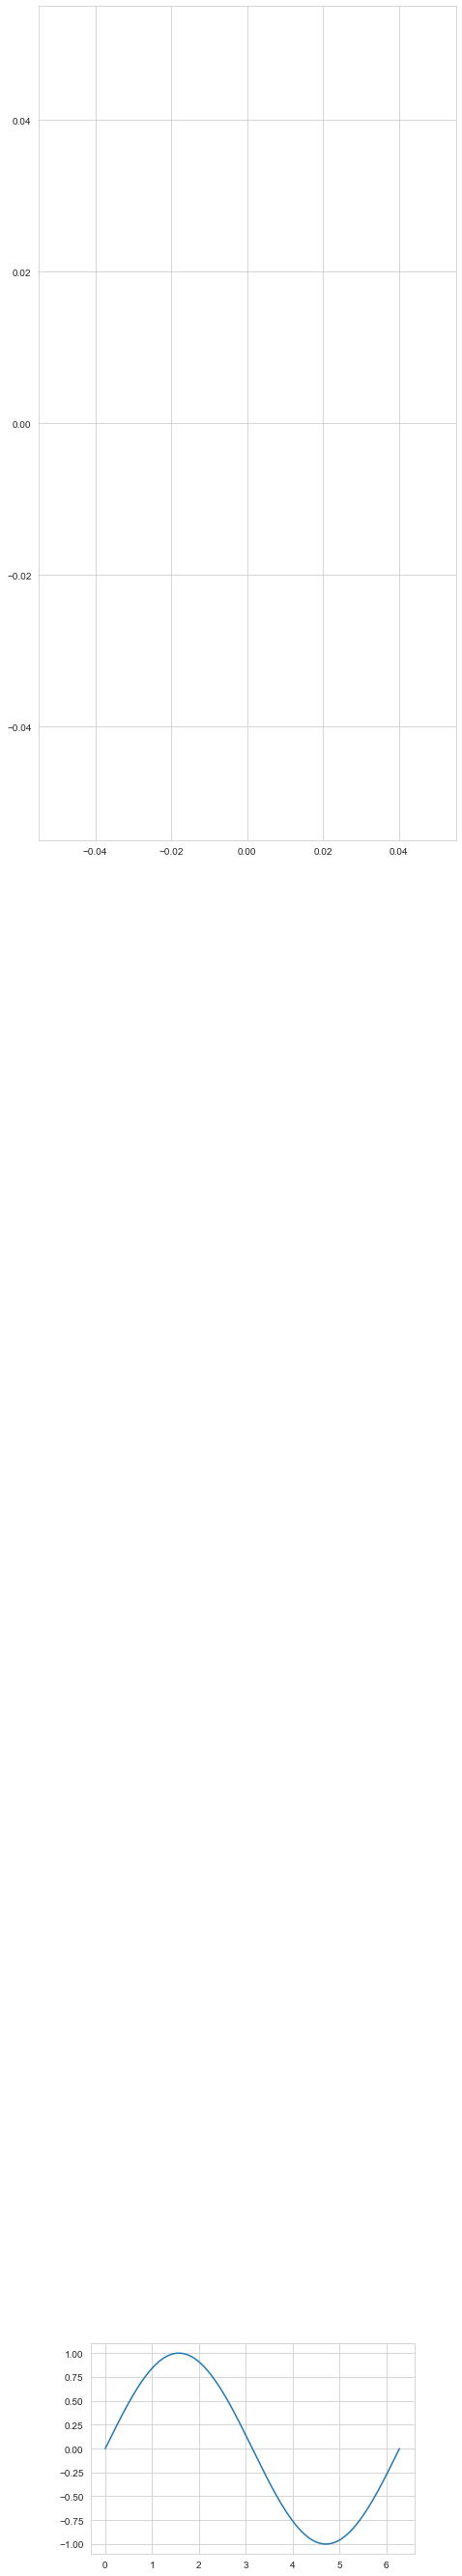

In [44]:
# fig = plt.figure(figsize=[5,5])
fig, ax =plt.subplots()

t = np.arange(0.0, np.pi * 2, .0001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axes([0, np.pi * 2, 1, 3])
# ax = plt.axes()
# line, = ax.plot([], [], lw=3)
red_dot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    # x = np.linspace(0, 4, num_reps)
    # y = np.sin(2 * np.pi * (x - frame))
    red_dot.set_data(i, np.sin(i))
    print(i)
    return red_dot, 
    # line.set_data(i, np.sin(i))
    # return line,
anim = FuncAnimation(fig, animate,
                     frames=np.arange(0, np.pi * 2)
                     ,interval=10
                     ,blit = True
                     ,repeat = True
                    )

HTML(anim.to_jshtml())
# plt.show()
# anim.save("xx.gif", writer="imagemagick")